 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path("Resources/whale_returns.csv")

In [3]:
whale_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
csv_path = Path("../Starter_Code/Resources/algo_returns.csv")

In [7]:
algo_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
csv_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv

In [11]:
sp500_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace(r'\W',"")
sp500_df['Close'] = sp500_df['Close'].astype('int')
print(sp500_df)

             Close
Date              
2019-04-23  293368
2019-04-22  290797
2019-04-18  290503
2019-04-17  290045
2019-04-16  290706
...            ...
2012-10-05  146093
2012-10-04  146140
2012-10-03  145099
2012-10-02  144575
2012-10-01  144449

[1649 rows x 1 columns]


C:\Users\sagui\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [15]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [16]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P 500 Returns"]
sp500_daily_returns.columns = columns
sp500_daily_returns.head()

,S&P 500 Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
column_appended_data
column_appended_data.sort_index(inplace=True)
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

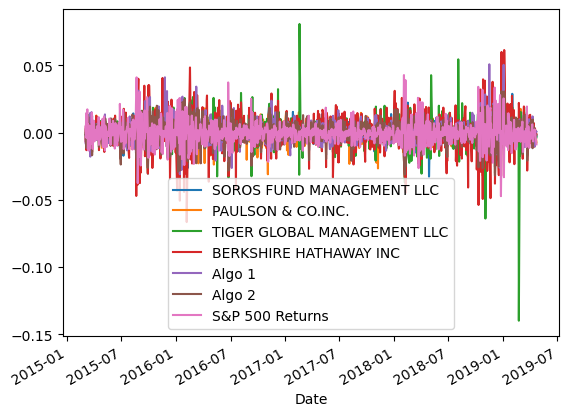

In [18]:
# Plot daily returns of all portfolios
column_appended_data.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

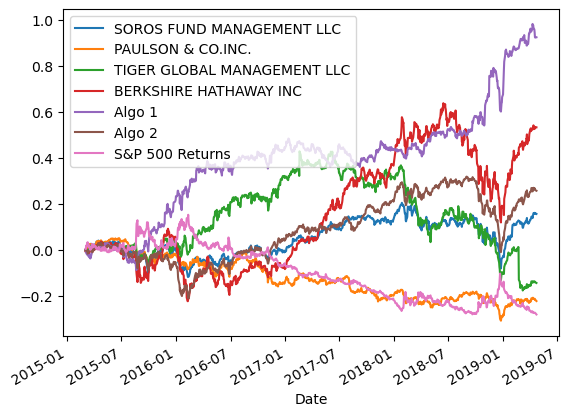

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + column_appended_data).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

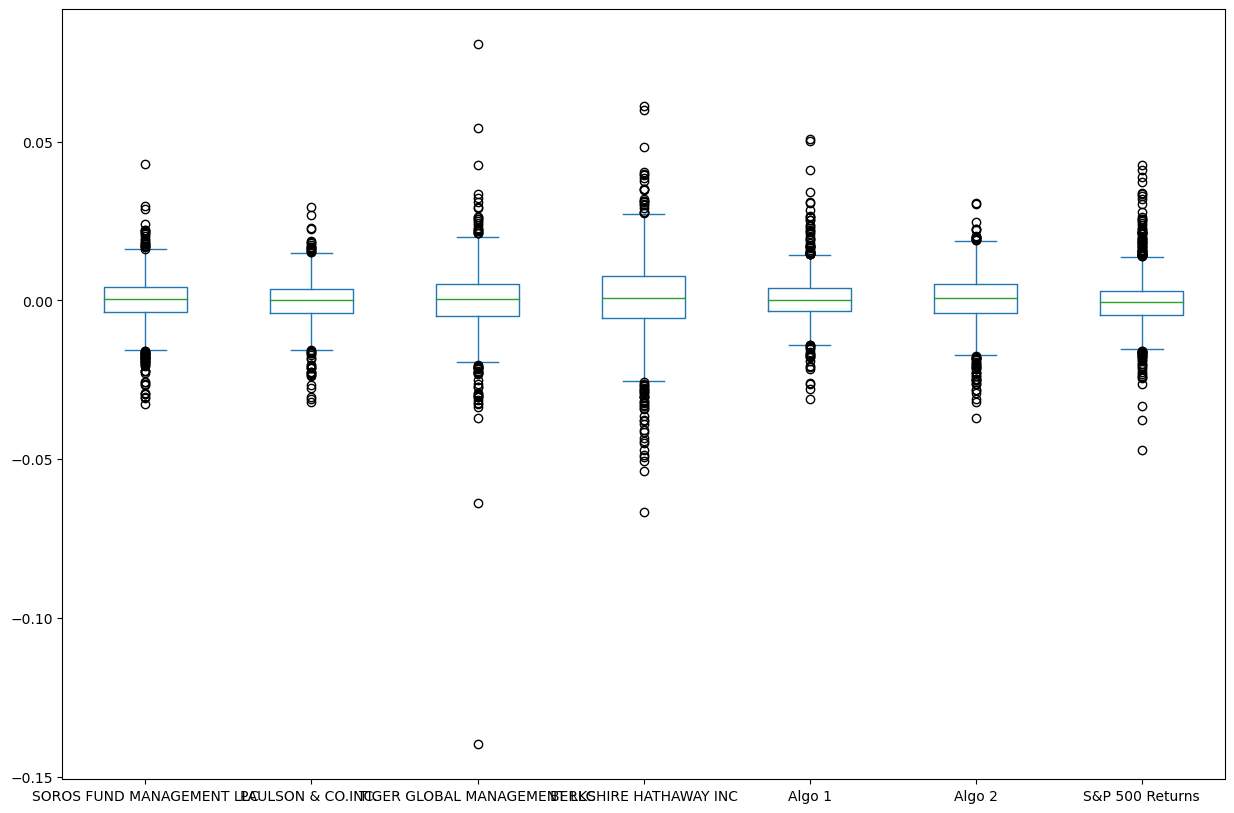

In [20]:
column_appended_data.plot.box(figsize = (15, 10))

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Risk'}>

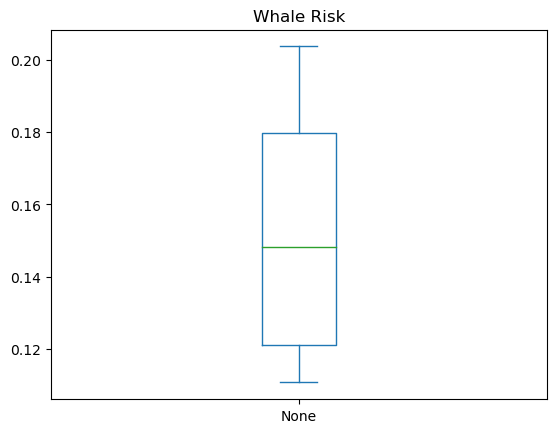

In [21]:
# Box plot to visually show risk
whale_volatility = whale_df.std() * np.sqrt(252)
whale_volatility.sort_values(inplace=True)
whale_volatility.plot.box(title='Whale Risk')

<AxesSubplot:title={'center':'Algo Risk'}>

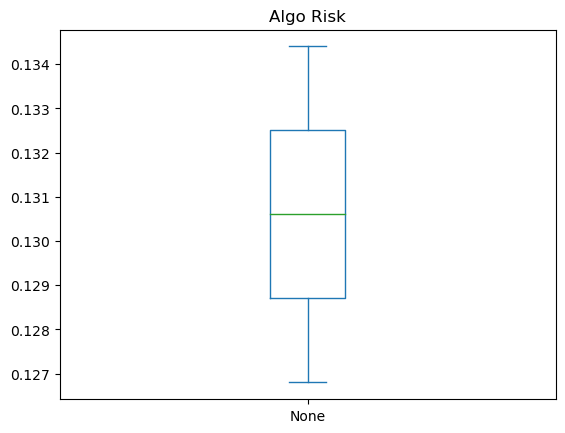

In [22]:
algo_volatility = algo_df.std() * np.sqrt(252)
algo_volatility.sort_values(inplace=True)
algo_volatility.plot.box(title='Algo Risk')

<AxesSubplot:title={'center':'S&P 500 Risk'}>

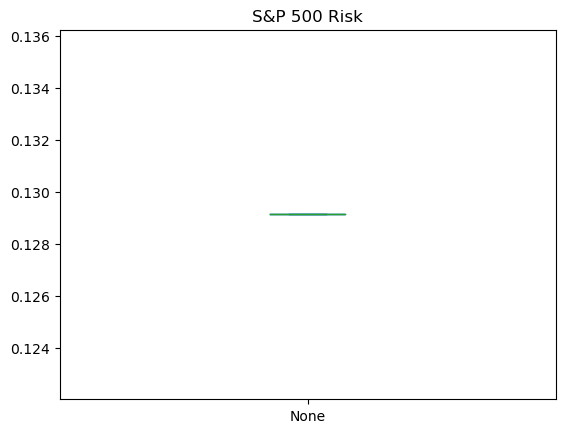

In [23]:
sp500_volatility = sp500_daily_returns.std() * np.sqrt(252)
sp500_volatility.sort_values(inplace=True)
sp500_volatility.plot.box(title='S&P 500 Risk')

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = column_appended_data.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Returns                0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()

# Determine which portfolios are riskier than the S&P 500
sp500_std[0] < all_portfolio_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
S&P 500 Returns                 True
dtype: bool

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
all_portfolio_std * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500 Returns                0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_std
# Plot the rolling standard deviation
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Returns                0.008587
dtype: float64

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
price_corr = column_appended_data.corr()

# Display de correlation matrix
price_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500 Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

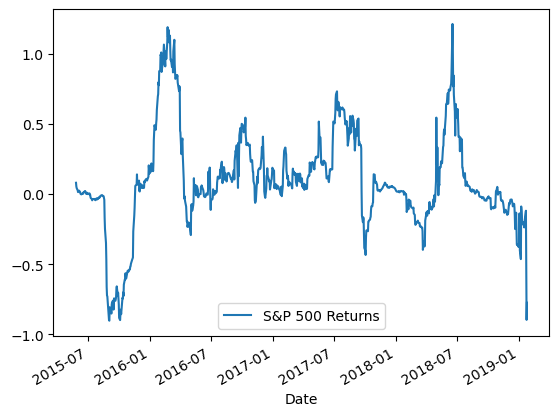

In [29]:
# Calculate covariance of a single portfolio
covariance = column_appended_data['BERKSHIRE HATHAWAY INC'].rolling(60).cov(sp500_daily_returns)
# Calculate variance of S&P 500
variance = sp500_daily_returns.rolling(60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

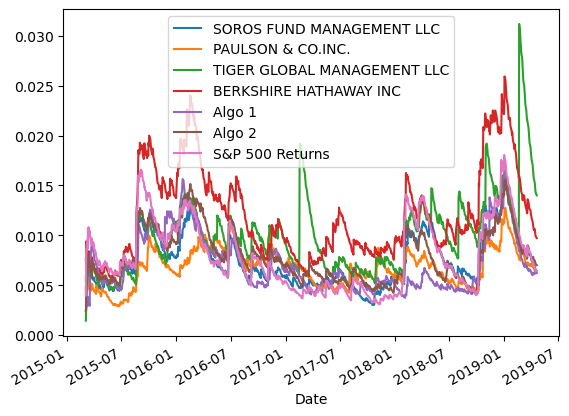

In [30]:
# Use `ewm` to calculate the rolling window
column_appended_data.ewm(21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe=(column_appended_data.mean()*252) / (all_portfolio_std * np.sqrt(252)) 
sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Returns               -0.518582
dtype: float64

<AxesSubplot:>

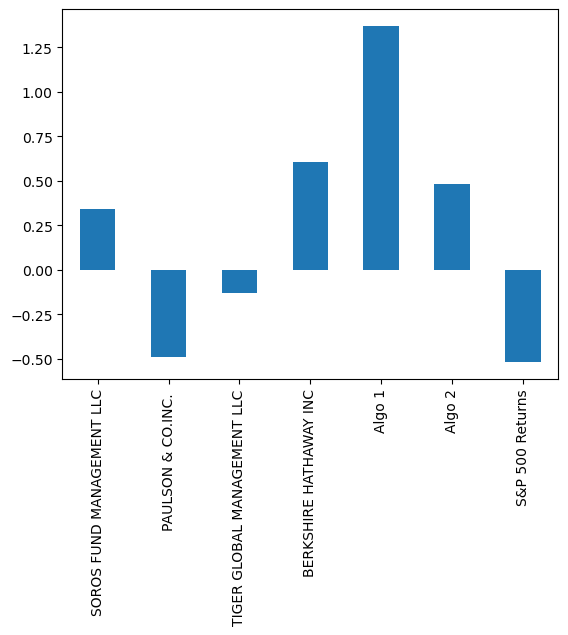

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategies 1 out performed all the whales and S&P 500 portfolios, and algo 2 outperformed 3 of the 4 whale portfolios as well as S&P 500 portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock
aapl_df = pd.read_csv('Resources/aapl_historical.csv')
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [45]:
# Reading data from 2nd stock
cost_df = pd.read_csv('Resources/cost_historical.csv')
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [46]:
# Reading data from 3rd stock
goog_df = pd.read_csv('Resources/goog_historical.csv') 
goog_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [47]:
# Combine all stocks in a single DataFrame
custom_combined_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
custom_combined_df
custom_combined_df.sort_index(inplace=True)
custom_combined_df.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47,GOOG,5/9/2019,1162.38
1,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34,GOOG,5/8/2019,1166.27
2,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18,GOOG,5/7/2019,1174.10
3,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23,GOOG,5/6/2019,1189.39
4,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62,GOOG,5/3/2019,1185.40


In [49]:
# Reset Date index
custom_combined_df.set_index('Trade DATE', inplace=True)
custom_combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
"(5/9/2019, 5/9/2019, 5/9/2019)",AAPL,200.72,COST,243.47,GOOG,1162.38
"(5/8/2019, 5/8/2019, 5/8/2019)",AAPL,202.90,COST,241.34,GOOG,1166.27
"(5/7/2019, 5/7/2019, 5/7/2019)",AAPL,202.86,COST,240.18,GOOG,1174.10
"(5/6/2019, 5/6/2019, 5/6/2019)",AAPL,208.48,COST,244.23,GOOG,1189.39
"(5/3/2019, 5/3/2019, 5/3/2019)",AAPL,211.75,COST,244.62,GOOG,1185.40


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [54]:
# Calculate daily returns
daily_returns = custom_combined_df.pct_change()

# Drop NAs

# Display sample data


TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!